Stock Price Prediction using Sentiment Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf #works on yahoo finance backend and helps in pulling specific stocks
import plotly.graph_objects as go #used for candlestick pattern plot

Example pulling Microsoft stock

In [2]:
msft = yf.Ticker("MSFT") #we can use .Ticker() to pull any stock needed like here is microsoft stock

In [3]:
info = msft.info #pulls the information from yahoo finance website and is a dict type

In [4]:
hist = msft.history(period = "max") #default period is one month and max gives all the history of prices

<Axes: xlabel='Date'>

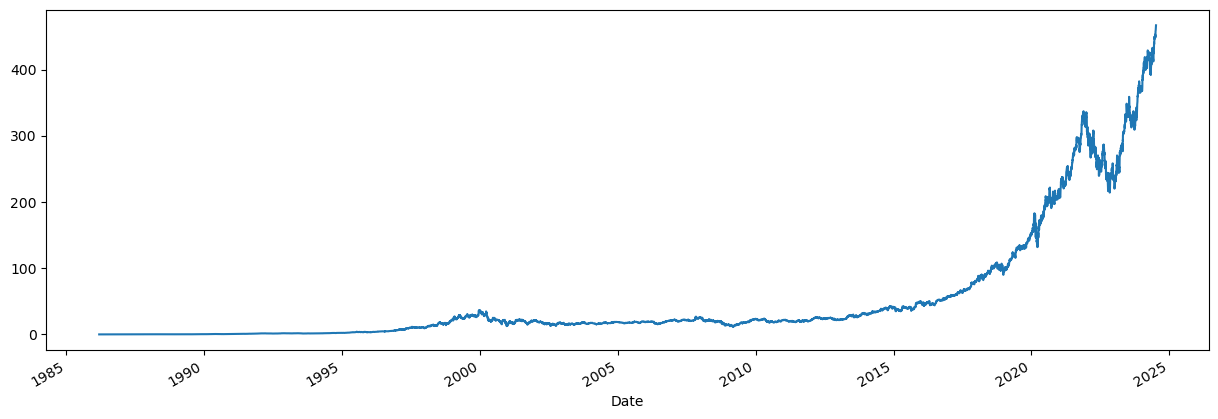

In [5]:
hist["Open"].plot(figsize = (15, 5))

In [6]:
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21 00:00:00-04:00,0.00,2.0
1990-04-16 00:00:00-04:00,0.00,2.0
1991-06-27 00:00:00-04:00,0.00,1.5
1992-06-15 00:00:00-04:00,0.00,1.5
1994-05-23 00:00:00-04:00,0.00,2.0
...,...,...
2023-05-17 00:00:00-04:00,0.68,0.0
2023-08-16 00:00:00-04:00,0.68,0.0
2023-11-15 00:00:00-05:00,0.75,0.0


In [7]:
msft.calendar

{'Dividend Date': datetime.date(2024, 9, 12),
 'Ex-Dividend Date': datetime.date(2024, 8, 15),
 'Earnings Date': [datetime.date(2024, 7, 23), datetime.date(2024, 7, 29)],
 'Earnings High': 3.31,
 'Earnings Low': 2.86,
 'Earnings Average': 2.93,
 'Revenue High': 65543000000,
 'Revenue Low': 64000000000,
 'Revenue Average': 64348000000}

Pulling other stocks and analyzing 2 years of history

In [19]:
stocks = ["NVDA", "SPOT", "META", "MSFT", "AMZN", "TSLA", "C", "AAPL"] 

In [20]:
hists = {}
for s in stocks:
    tkr = yf.Ticker(s)
    history = tkr.history(period = "2y")
    hists[s] = history

In [21]:
#plotting the stock price in candlestick pattern
for stk in stocks:
    temp_df = hists[stk].copy()

    fig = go.Figure(data = [go.Candlestick(x = temp_df.index,
                open = temp_df["Open"],
                high = temp_df["High"],
                low = temp_df["Low"],
                close = temp_df["Close"],)])

    fig.update_layout(
    margin = dict(l = 20, r = 20, t = 60, b = 20),
    height = 300,
    paper_bgcolor = "LightSteelBlue",
    title = stk,
    )

    fig.show()  

Pulling News about each Stock from Finviz

In [22]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
news_data = {}
parsed_data = []
for i in stocks:
    url = "https://finviz.com/quote.ashx?t="
    u = url + i 
    req = Request(url = u, headers = {"user-agent" : "my-app"})
    response = urlopen(req)
    html = BeautifulSoup(response, "html")
    news = html.find(id= "news-table")
    news_data[i] = news
for ticker, news in news_data.items():
    for row in news.findAll("tr"):
        title = row.a.text
        date_data = row.td.text.strip().split(" ")
        date_data = [data for data in date_data if data and data != '\r\n']
        if len(date_data) == 1:
            time = date_data[0]
            date = "Unknown"
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([ticker, date_data, time, title])

print(parsed_data)
    

[['NVDA', ['Today', '08:15AM'], '08:15AM', 'How Nvidia Stock Soared 150% in the First Half of 2024 -- and Why the Next Leg Up Could Come in August'], ['NVDA', ['08:05AM'], '08:05AM', 'AI Stock Launches A Breakout As Microsoft, Nvidia Fuel Gains'], ['NVDA', ['08:04AM'], '08:04AM', 'Nvidia Stock Rises. The Chip Maker Is Flirting With a New Record High.'], ['NVDA', ['08:00AM'], '08:00AM', 'Nvidia Stock Climbs Back Near Highs; Is It Time To Buy Now?'], ['NVDA', ['08:00AM'], '08:00AM', 'AI stocks like Nvidia and Microsoft are nowhere near a bubble'], ['NVDA', ['07:57AM'], '07:57AM', '3 Millionaire-Maker Stocks With More Potential Than Nvidia'], ['NVDA', ['07:48AM'], '07:48AM', '5 Things to Know Before the Stock Market Opens'], ['NVDA', ['07:45AM'], '07:45AM', 'Nvidia Is Buying Shares of These 5 AI Companies. Should You Do the Same?'], ['NVDA', ['07:00AM'], '07:00AM', '3 Stocks to Buy Before Q2 Earnings Season Begins'], ['NVDA', ['06:50AM'], '06:50AM', '3 Reasons Why Advanced Micro Devices S

Sentiment Analysis

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df = pd.DataFrame(parsed_data, columns= ["ticker", "date", "time", "title"])
vader = SentimentIntensityAnalyzer()
df["compound"] = df["title"].apply(lambda x: vader.polarity_scores(title)["compound"])
df

#since the compound score for all the ticker is same which means all the stocks have seen a growth in their price which is evident from above plots, due to which the news
#sentiment score is positive and half way near to +1.

,ticker,date,time,title,compound
0,NVDA,"[Today, 08:15AM]",08:15AM,How Nvidia Stock Soared 150% in the First Half...,0.6369
1,NVDA,[08:05AM],08:05AM,"AI Stock Launches A Breakout As Microsoft, Nvi...",0.6369
2,NVDA,[08:04AM],08:04AM,Nvidia Stock Rises. The Chip Maker Is Flirting...,0.6369
3,NVDA,[08:00AM],08:00AM,Nvidia Stock Climbs Back Near Highs; Is It Tim...,0.6369
4,NVDA,[08:00AM],08:00AM,AI stocks like Nvidia and Microsoft are nowher...,0.6369
...,...,...,...,...,...
795,AAPL,[06:00AM],06:00AM,45% of Warren Buffett's $398 Billion Portfolio...,0.6369
796,AAPL,[04:00AM],04:00AM,Nvidia will win the race to a $4 trillion mark...,0.6369
797,AAPL,"[Jul-06-24, 09:00AM]",09:00AM,"Tesla's comeback, Zuckerberg's Threads vs. Mus...",0.6369
798,AAPL,[09:00AM],09:00AM,"Forget the ""Magnificent Seven."" What About the...",0.6369
